<a href="https://colab.research.google.com/github/Brajo280603/learning_ml/blob/main/magic_dataset_tutorial_fcc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries





In [6]:

!pip install -U imbalanced-learn

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report

[dataset link](https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope)

# Creating Pandas Dataframe from dataSet

In [9]:
cols = ["fLength","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]
df = pd.read_csv("magic04.data",names=cols)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [10]:
df["class"] = (df["class"] == "g").astype(int) # compares each row , if found as g , set as true(1) , if not set as false(0)

In [11]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

# Plotting the data Informations


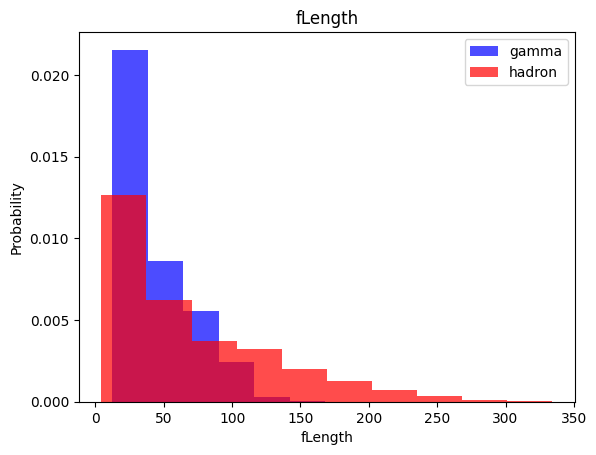

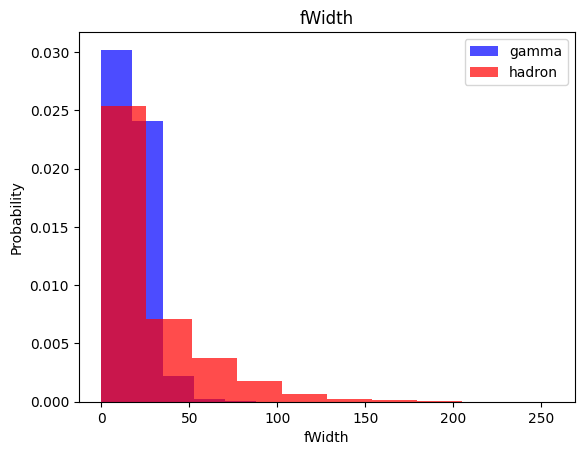

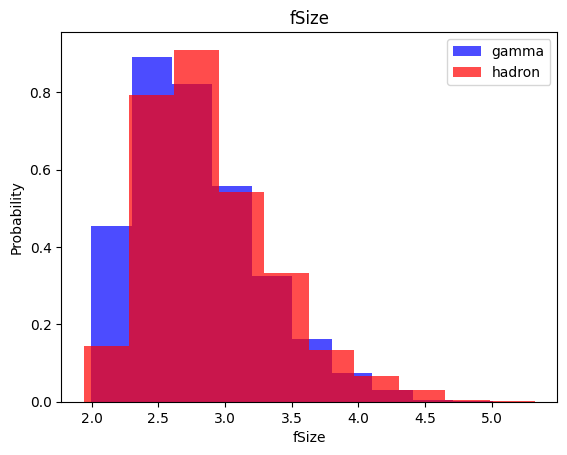

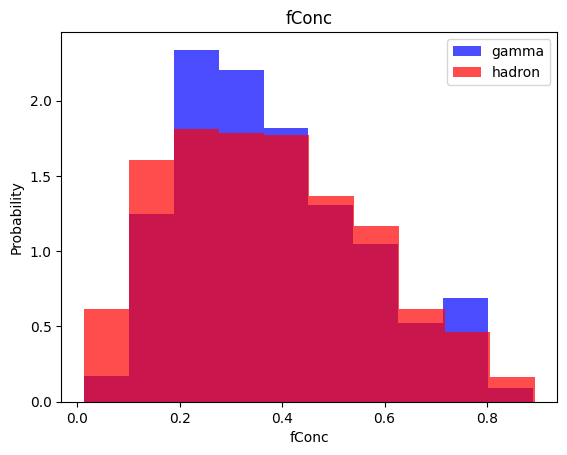

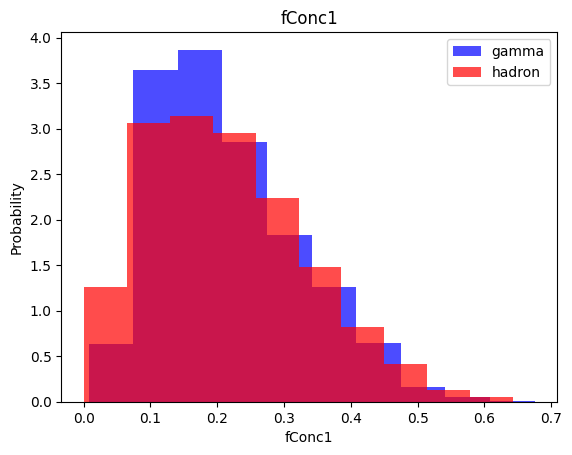

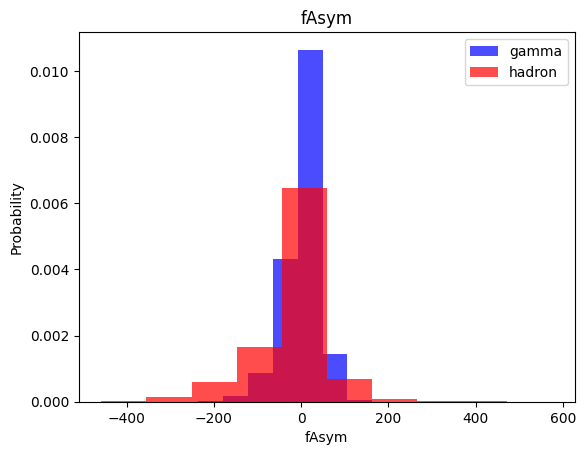

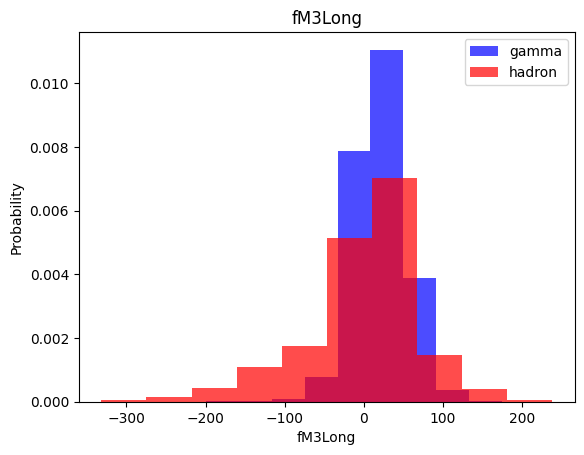

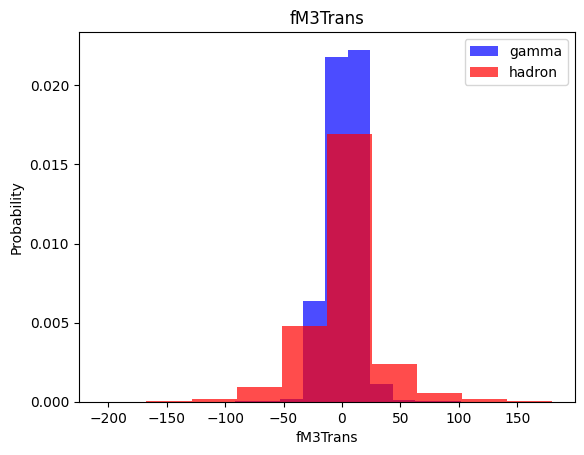

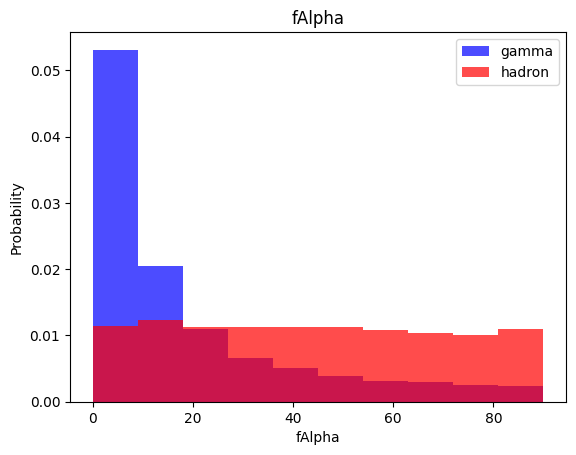

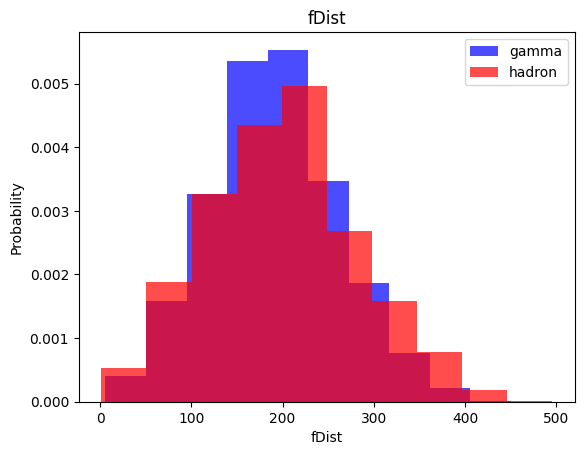

In [12]:
for label in cols[:-1]:
  plt.hist(df[df["class"] == 1][label],color='blue', label='gamma',alpha=0.7,density=True)
  plt.hist(df[df["class"] == 0][label],color='red', label='hadron',alpha=0.7,density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()


# creating Training, Validation and Testing Dataset and normalization


In [13]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [14]:
def scale_dataset(dataframe, oversample=False):
  x = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  x = scaler.fit_transform(x)

  if oversample:
    ros = RandomOverSampler()
    x, y = ros.fit_resample(x,y)

  data = np.hstack((x,np.reshape(y,(-1,1))))

  return data, x, y

In [15]:
train, x_train, y_train = scale_dataset(train, True)
valid, x_valid, y_valid = scale_dataset(valid, False)
test, x_test, y_test = scale_dataset(test, False)

# K-Nearest Neighbour




In [26]:
from sklearn.neighbors import KNeighborsClassifier


In [129]:
knn_model = KNeighborsClassifier(n_neighbors=5)

knn_model = knn_model.fit(x_train,y_train)

In [130]:
y_pred = knn_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.71      0.73      1349
           1       0.85      0.87      0.86      2455

    accuracy                           0.81      3804
   macro avg       0.80      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804



# Naive Bayes


In [137]:
from sklearn.naive_bayes import GaussianNB

In [138]:
nb_model = GaussianNB()

nb_model = nb_model.fit(x_train,y_train)

In [139]:
y_pred = nb_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.41      0.52      1349
           1       0.74      0.91      0.81      2455

    accuracy                           0.73      3804
   macro avg       0.73      0.66      0.67      3804
weighted avg       0.73      0.73      0.71      3804



# Logistic Regression

In [134]:
from sklearn.linear_model import LogisticRegression

In [135]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(x_train,y_train)

In [136]:
y_pred = lg_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.72      0.71      1349
           1       0.84      0.83      0.83      2455

    accuracy                           0.79      3804
   macro avg       0.77      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



# Support Vector Machines (SVM)

In [140]:
from sklearn.svm import SVC

In [144]:
svm_model = SVC()

svm_model = svm_model.fit(x_train,y_train)

In [145]:
y_pred = svm_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79      1349
           1       0.88      0.90      0.89      2455

    accuracy                           0.86      3804
   macro avg       0.84      0.84      0.84      3804
weighted avg       0.86      0.86      0.86      3804



# Neural Networks

In [20]:
!pip install -U tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 828.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 84.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 119.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 120.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 7.2 MB/s eta 0:00:00


In [21]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')

print("GPU:", tf.config.list_physical_devices('GPU'))
print("Num GPUs:", len(physical_devices))

/usr/local/lib/python3.12/dist-packages/jax/_src/cloud_tpu_init.py:82: UserWarning: Transparent hugepages are not enabled. TPU runtime startup and shutdown time should be significantly improved on TPU v5e and newer. If not already set, you may need to enable transparent hugepages in your VM image (sudo sh -c "echo always > /sys/kernel/mm/transparent_hugepage/enabled")
  warnings.warn(


GPU: []
Num GPUs: 0


In [22]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,4))
  ax1.plot(history.history["loss"],label="loss")
  ax1.plot(history.history["val_loss"],label="val_loss")
  ax1.set_xlabel("Epoch")
  ax1.set_ylabel("Binary crossentropy")
  ax1.grid(True)
  ax2.plot(history.history["accuracy"],label="accuracy")
  ax2.plot(history.history["val_accuracy"],label="val_accuracy")
  ax2.set_xlabel("Epoch")
  ax2.set_ylabel("Accuracy")
  ax2.grid(True)
  plt.show()

In [23]:
def train_model(x_train,y_train,num_nodes,dropout_prob,learning_rate,batch_size,epochs):

  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes,activation="relu",input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes,activation="relu"),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1,activation="sigmoid")
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),loss="binary_crossentropy",metrics=['accuracy'])

  history = nn_model.fit(
      x_train,y_train,
      epochs=epochs,batch_size=batch_size,
      validation_split=0.2,
      verbose=0
  )

  return nn_model,history

16 nodes, dropout 0, learning_rate 0.1, batch_size 32


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


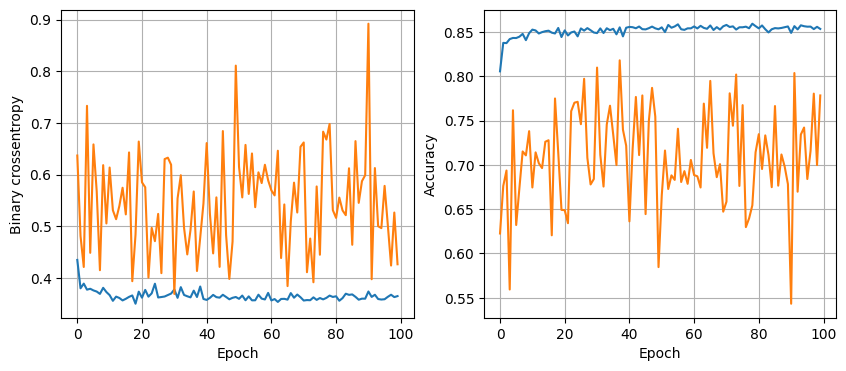

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 785us/step - accuracy: 0.8608 - loss: 0.3922
16 nodes, dropout 0, learning_rate 0.1, batch_size 64


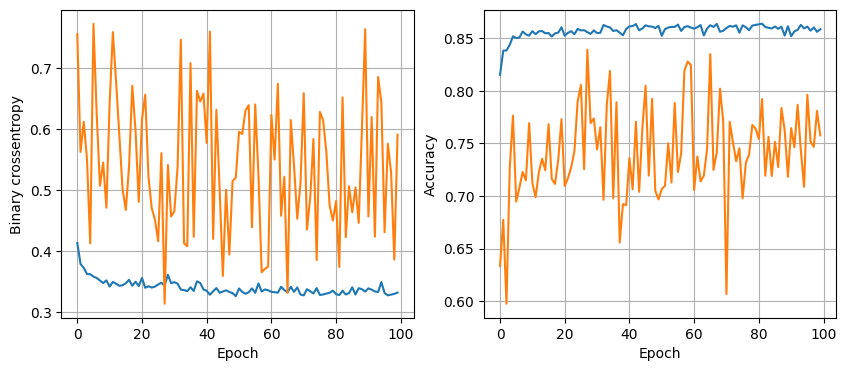

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 768us/step - accuracy: 0.8658 - loss: 0.3329
16 nodes, dropout 0, learning_rate 0.1, batch_size 128


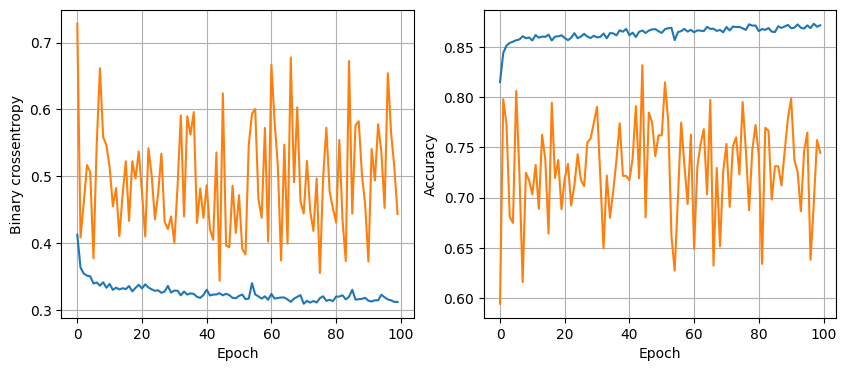

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step - accuracy: 0.8700 - loss: 0.3173
16 nodes, dropout 0, learning_rate 0.005, batch_size 32


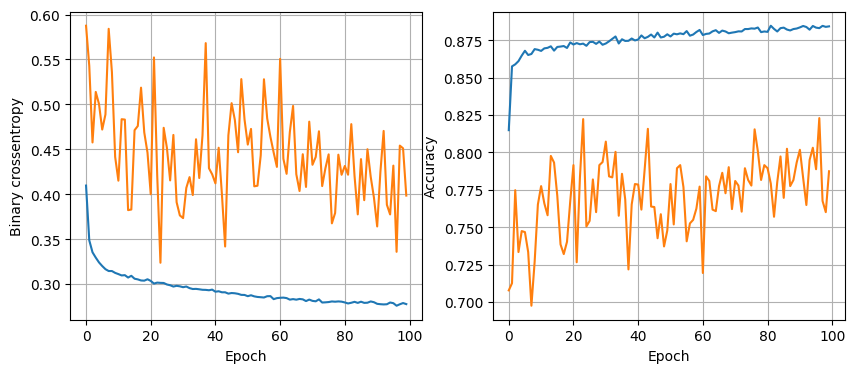

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step - accuracy: 0.8816 - loss: 0.3037
16 nodes, dropout 0, learning_rate 0.005, batch_size 64


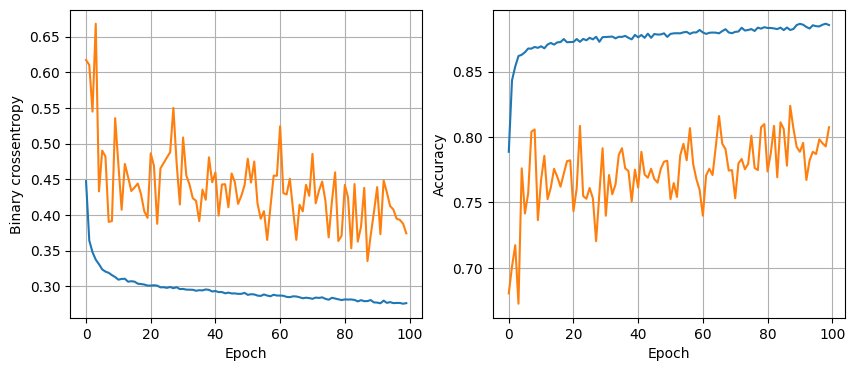

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 785us/step - accuracy: 0.8728 - loss: 0.2992
16 nodes, dropout 0, learning_rate 0.005, batch_size 128


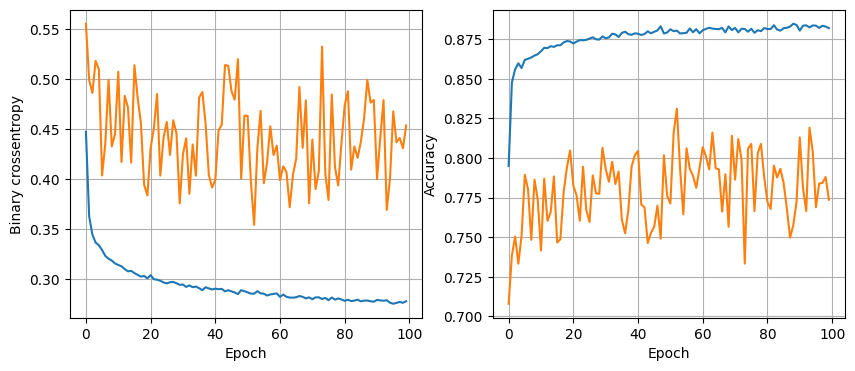

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step - accuracy: 0.8738 - loss: 0.3002
16 nodes, dropout 0, learning_rate 0.001, batch_size 32


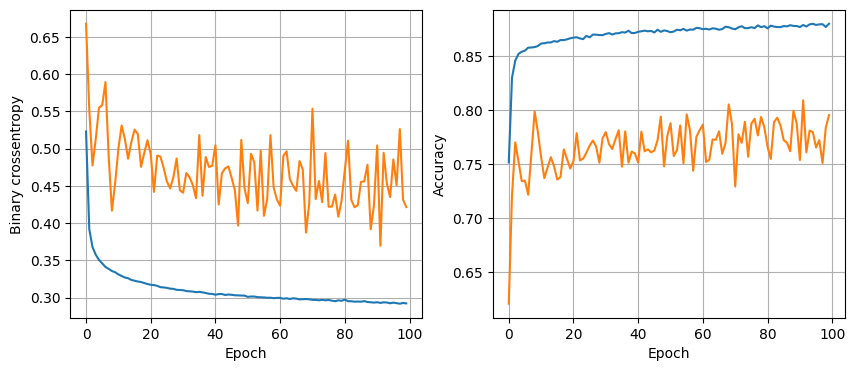

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step - accuracy: 0.8746 - loss: 0.2983
16 nodes, dropout 0, learning_rate 0.001, batch_size 64


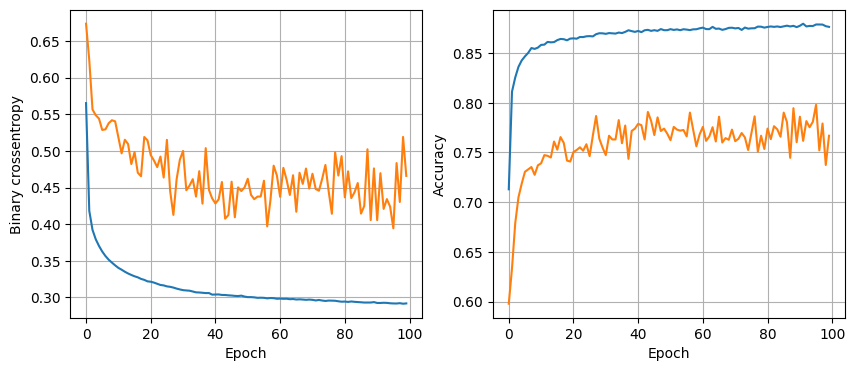

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - accuracy: 0.8777 - loss: 0.3000
16 nodes, dropout 0, learning_rate 0.001, batch_size 128


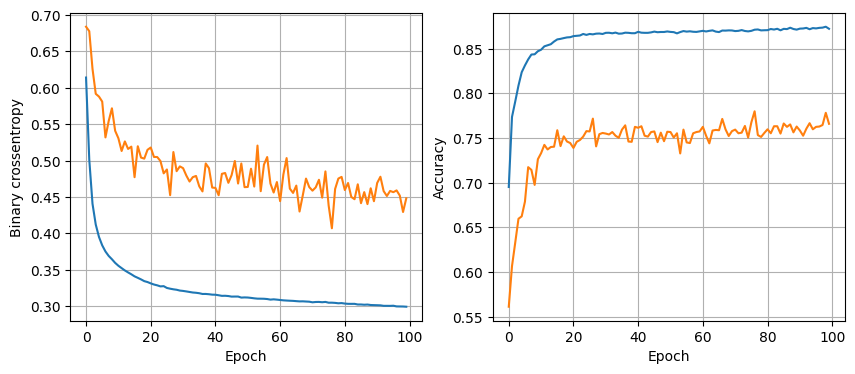

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step - accuracy: 0.8726 - loss: 0.3015
16 nodes, dropout 0.2, learning_rate 0.1, batch_size 32


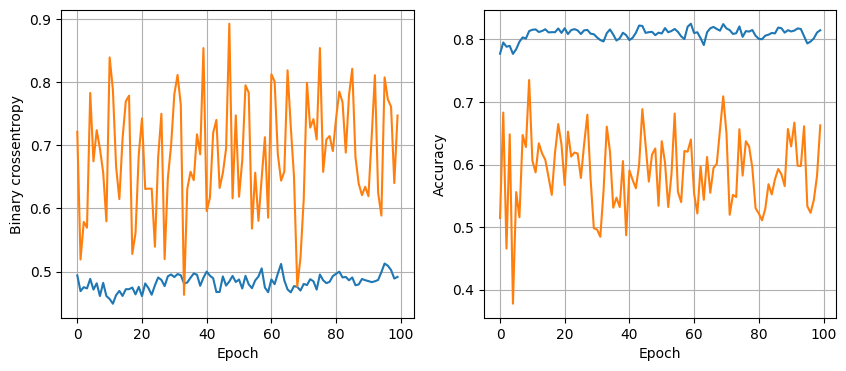

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step - accuracy: 0.8418 - loss: 0.4462
16 nodes, dropout 0.2, learning_rate 0.1, batch_size 64


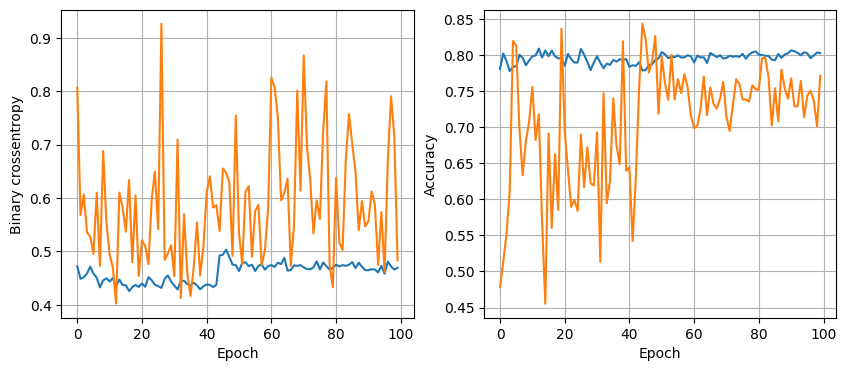

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 756us/step - accuracy: 0.8448 - loss: 0.4396
16 nodes, dropout 0.2, learning_rate 0.1, batch_size 128


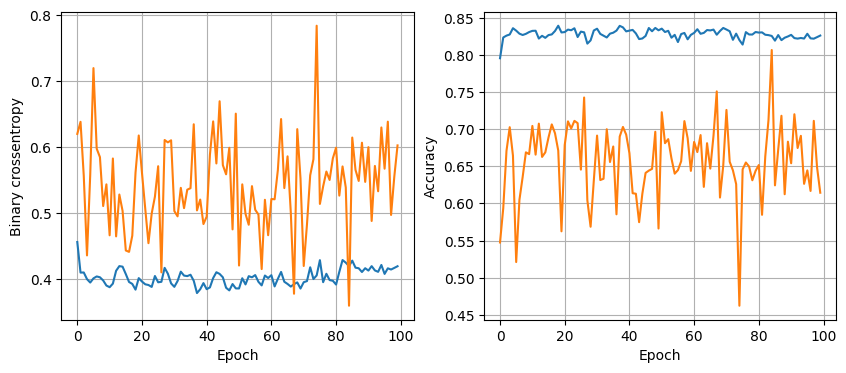

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step - accuracy: 0.8495 - loss: 0.3847
16 nodes, dropout 0.2, learning_rate 0.005, batch_size 32


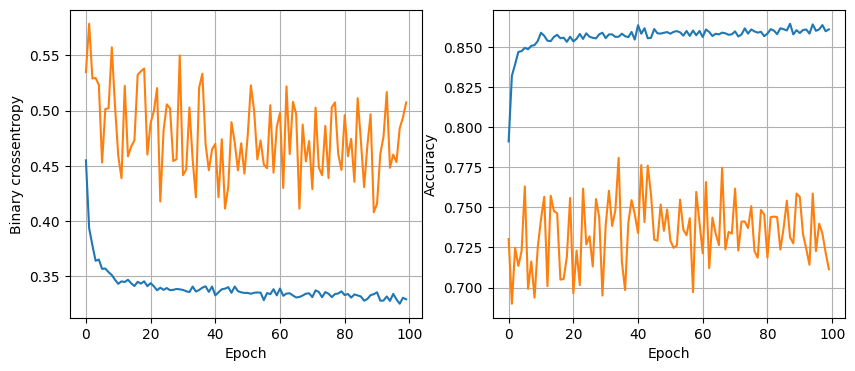

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step - accuracy: 0.8704 - loss: 0.3045
16 nodes, dropout 0.2, learning_rate 0.005, batch_size 64


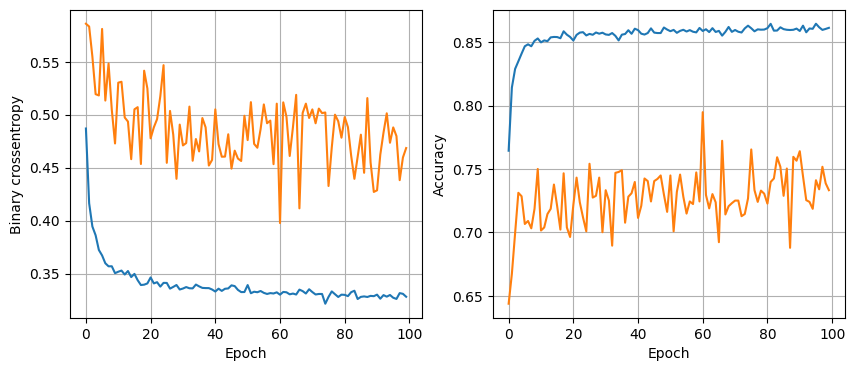

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step - accuracy: 0.8674 - loss: 0.3080
16 nodes, dropout 0.2, learning_rate 0.005, batch_size 128


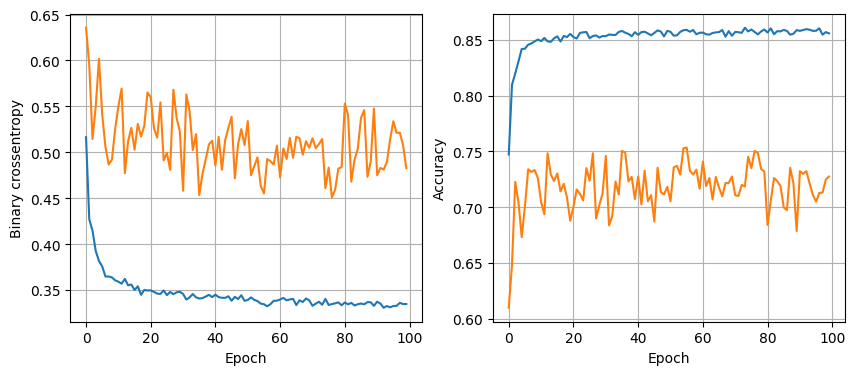

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step - accuracy: 0.8729 - loss: 0.3067
16 nodes, dropout 0.2, learning_rate 0.001, batch_size 32


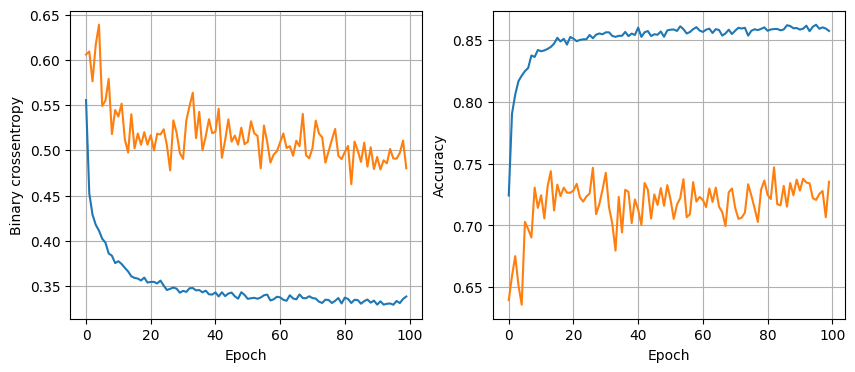

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 829us/step - accuracy: 0.8724 - loss: 0.3071
16 nodes, dropout 0.2, learning_rate 0.001, batch_size 64


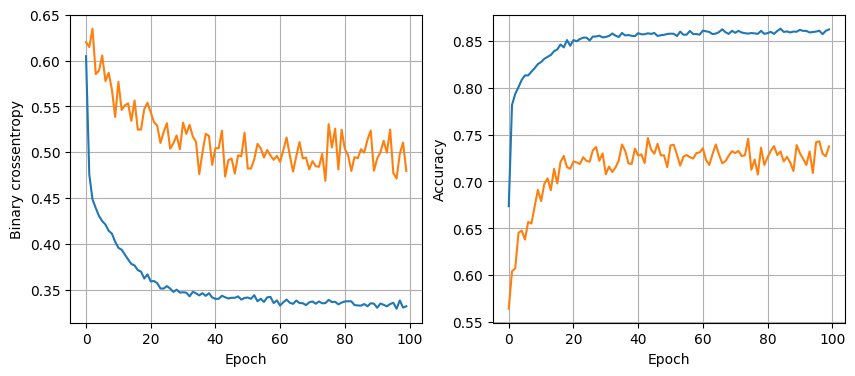

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step - accuracy: 0.8719 - loss: 0.3053
16 nodes, dropout 0.2, learning_rate 0.001, batch_size 128


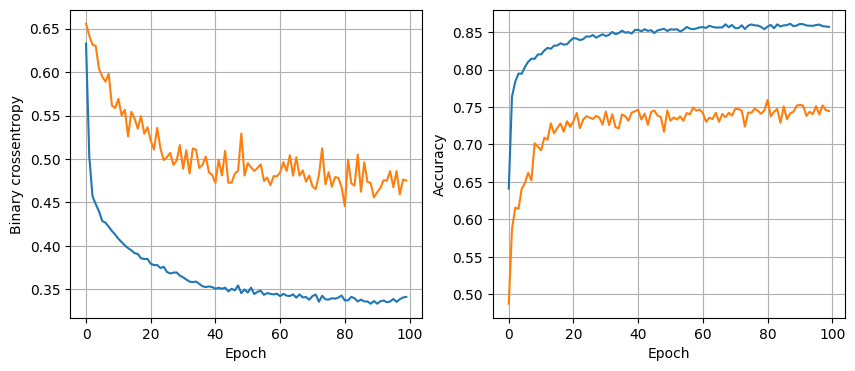

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step - accuracy: 0.8751 - loss: 0.3031
32 nodes, dropout 0, learning_rate 0.1, batch_size 32


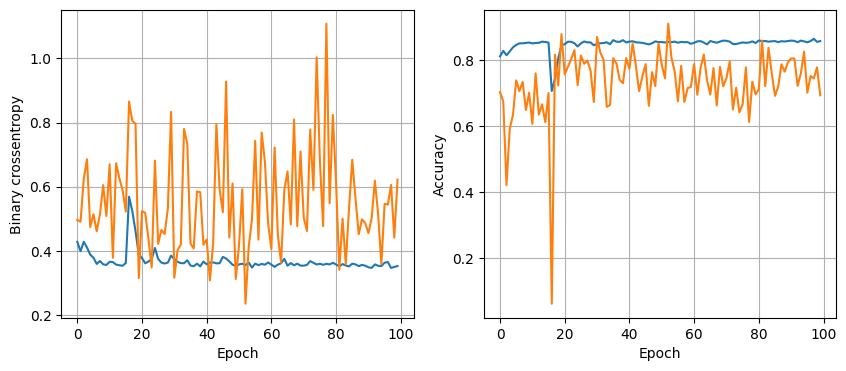

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 815us/step - accuracy: 0.8584 - loss: 0.3272
32 nodes, dropout 0, learning_rate 0.1, batch_size 64


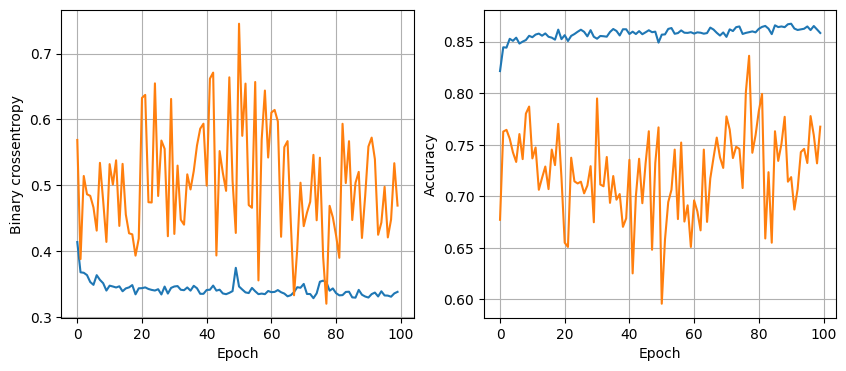

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 753us/step - accuracy: 0.8686 - loss: 0.3533
32 nodes, dropout 0, learning_rate 0.1, batch_size 128


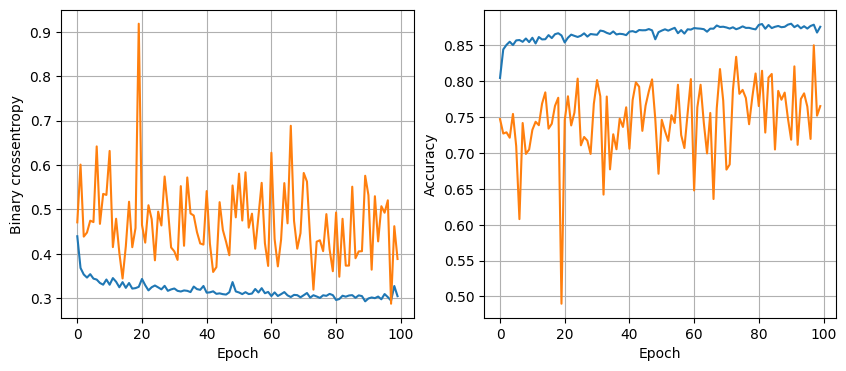

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 832us/step - accuracy: 0.8797 - loss: 0.3348
32 nodes, dropout 0, learning_rate 0.005, batch_size 32


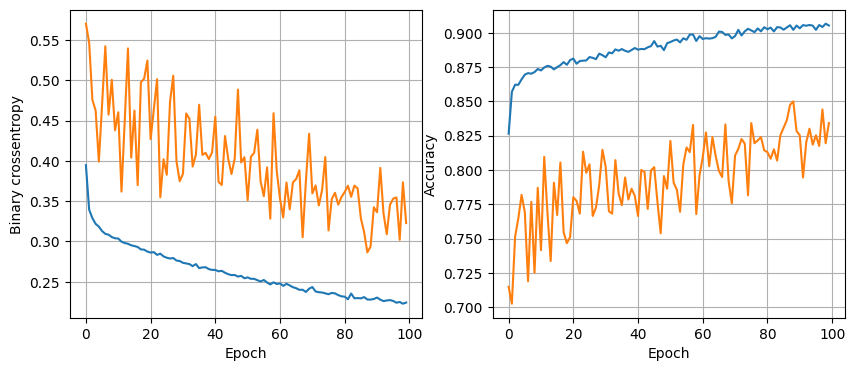

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step - accuracy: 0.8764 - loss: 0.3549
32 nodes, dropout 0, learning_rate 0.005, batch_size 64


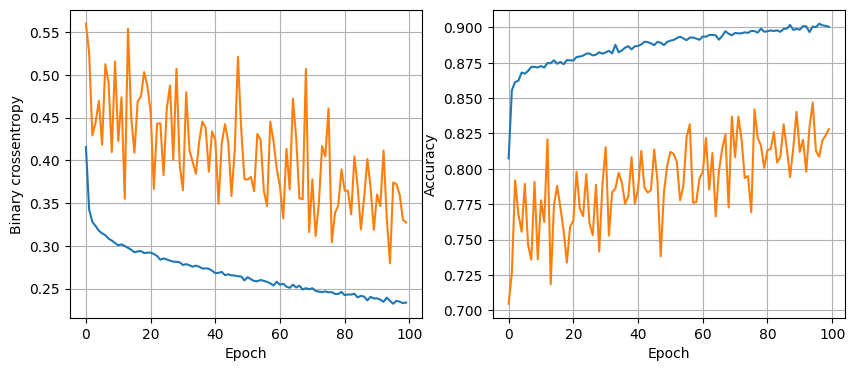

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step - accuracy: 0.8762 - loss: 0.3238
32 nodes, dropout 0, learning_rate 0.005, batch_size 128


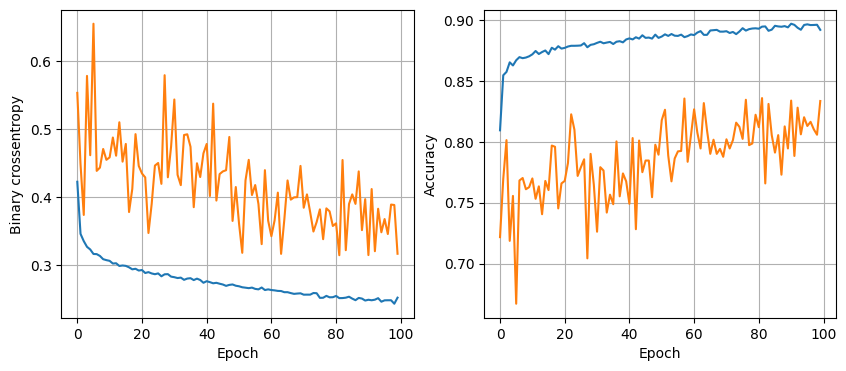

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step - accuracy: 0.8749 - loss: 0.3222
32 nodes, dropout 0, learning_rate 0.001, batch_size 32


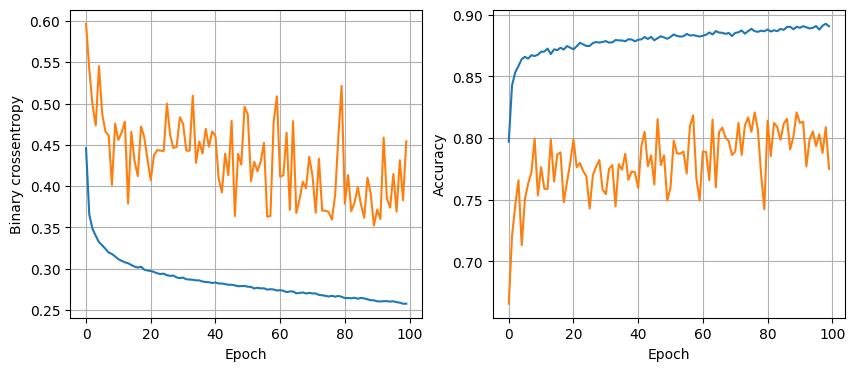

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step - accuracy: 0.8830 - loss: 0.2923
32 nodes, dropout 0, learning_rate 0.001, batch_size 64


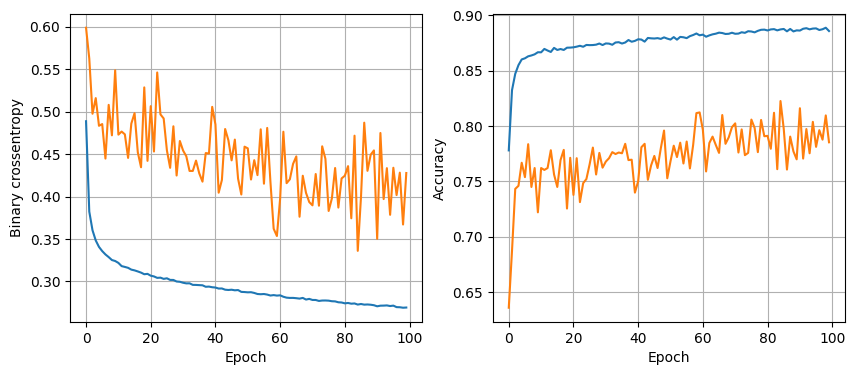

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step - accuracy: 0.8707 - loss: 0.3018
32 nodes, dropout 0, learning_rate 0.001, batch_size 128


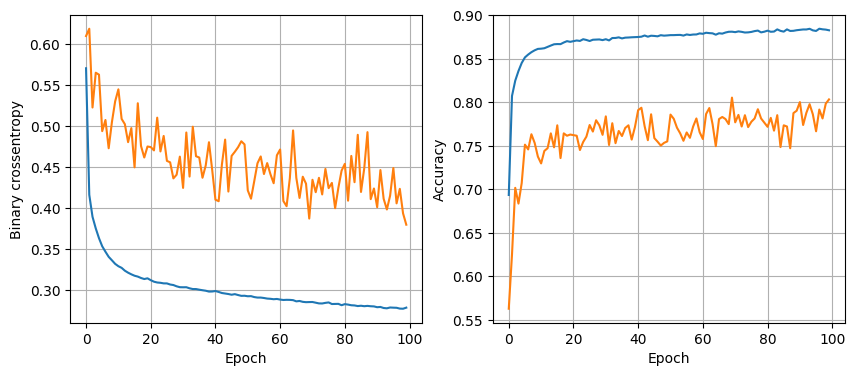

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 775us/step - accuracy: 0.8767 - loss: 0.3010
32 nodes, dropout 0.2, learning_rate 0.1, batch_size 32


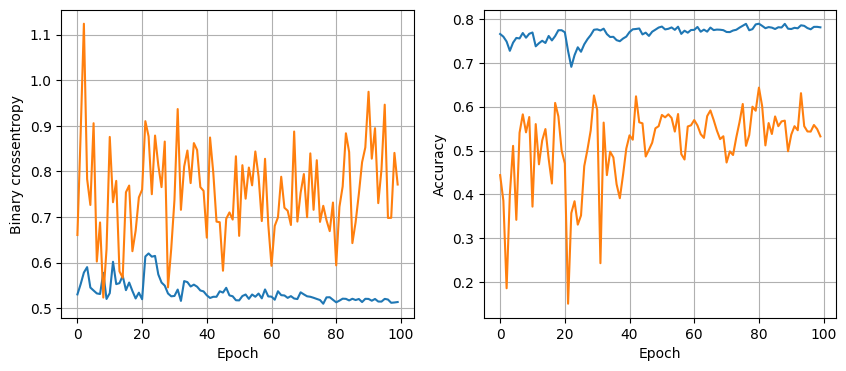

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step - accuracy: 0.8307 - loss: 0.4536
32 nodes, dropout 0.2, learning_rate 0.1, batch_size 64


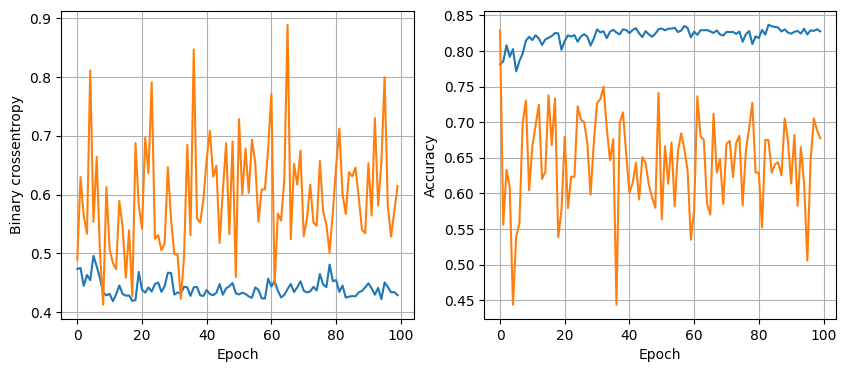

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step - accuracy: 0.8534 - loss: 0.3855
32 nodes, dropout 0.2, learning_rate 0.1, batch_size 128


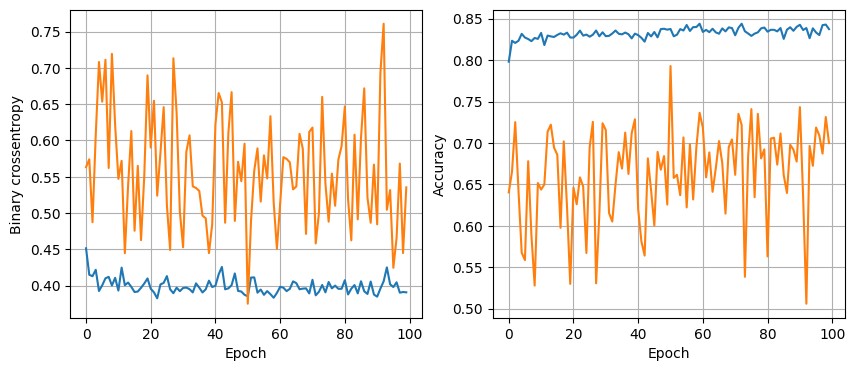

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 785us/step - accuracy: 0.8626 - loss: 0.3396
32 nodes, dropout 0.2, learning_rate 0.005, batch_size 32


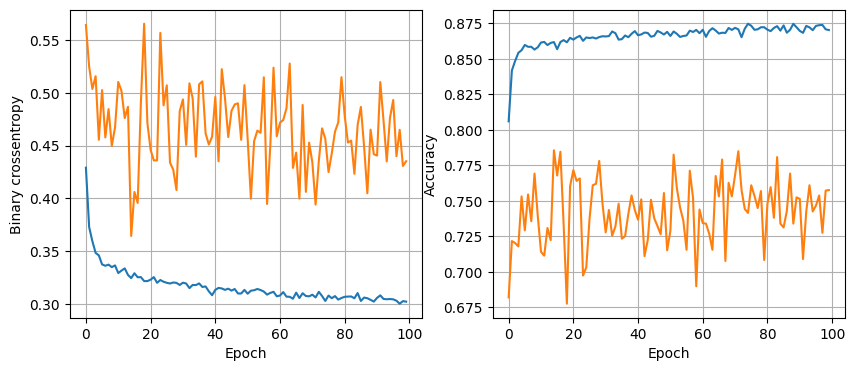

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step - accuracy: 0.8807 - loss: 0.2881
32 nodes, dropout 0.2, learning_rate 0.005, batch_size 64


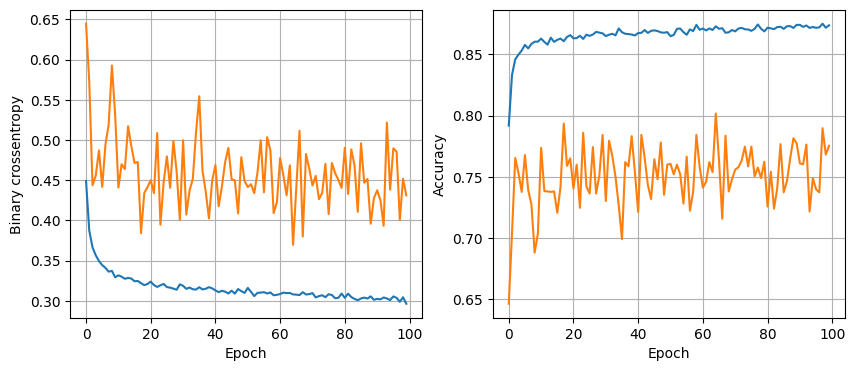

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step - accuracy: 0.8736 - loss: 0.2938
32 nodes, dropout 0.2, learning_rate 0.005, batch_size 128


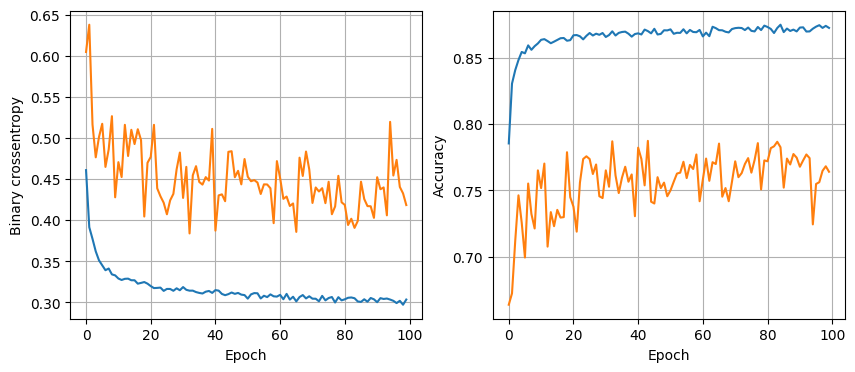

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step - accuracy: 0.8741 - loss: 0.2972
32 nodes, dropout 0.2, learning_rate 0.001, batch_size 32


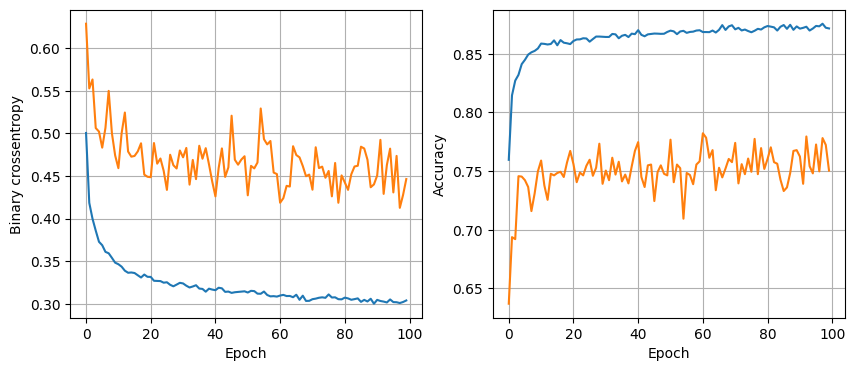

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 743us/step - accuracy: 0.8807 - loss: 0.2924
32 nodes, dropout 0.2, learning_rate 0.001, batch_size 64


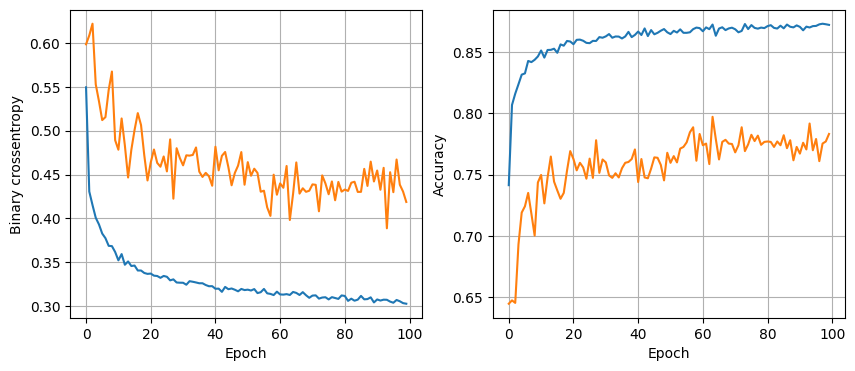

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step - accuracy: 0.8760 - loss: 0.2960
32 nodes, dropout 0.2, learning_rate 0.001, batch_size 128


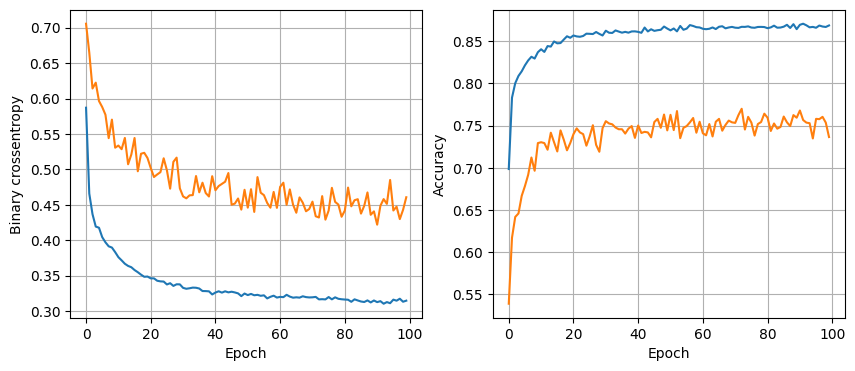

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 768us/step - accuracy: 0.8740 - loss: 0.2980
64 nodes, dropout 0, learning_rate 0.1, batch_size 32


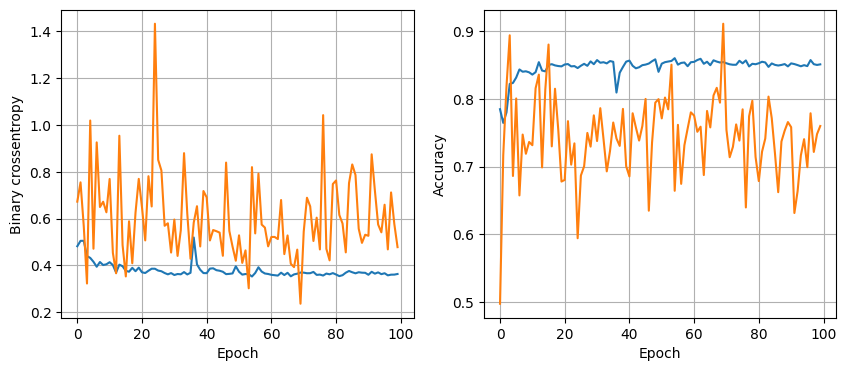

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step - accuracy: 0.8655 - loss: 0.3411
64 nodes, dropout 0, learning_rate 0.1, batch_size 64


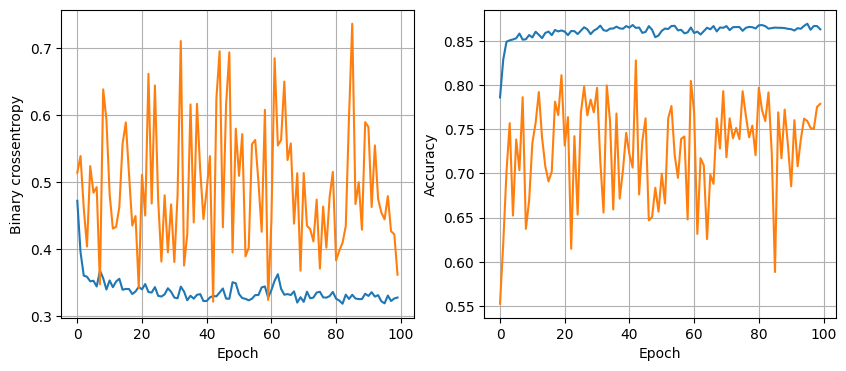

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step - accuracy: 0.8643 - loss: 0.3411
64 nodes, dropout 0, learning_rate 0.1, batch_size 128


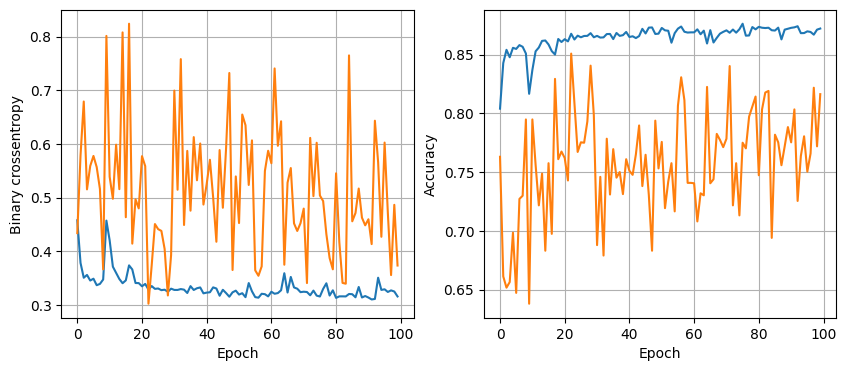

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step - accuracy: 0.8728 - loss: 0.3238
64 nodes, dropout 0, learning_rate 0.005, batch_size 32


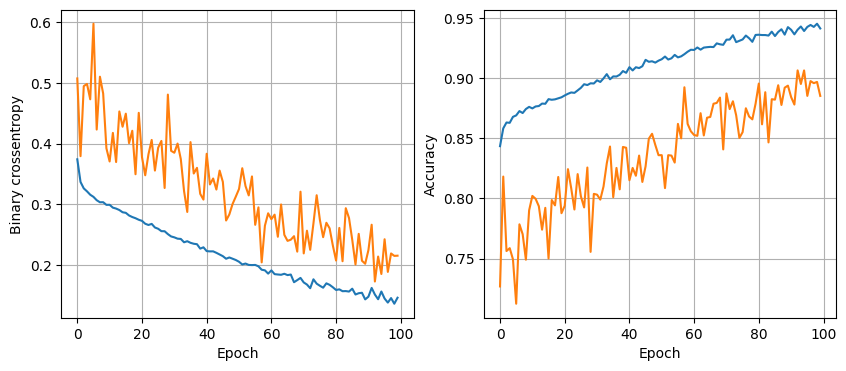

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step - accuracy: 0.8688 - loss: 0.5519
64 nodes, dropout 0, learning_rate 0.005, batch_size 64


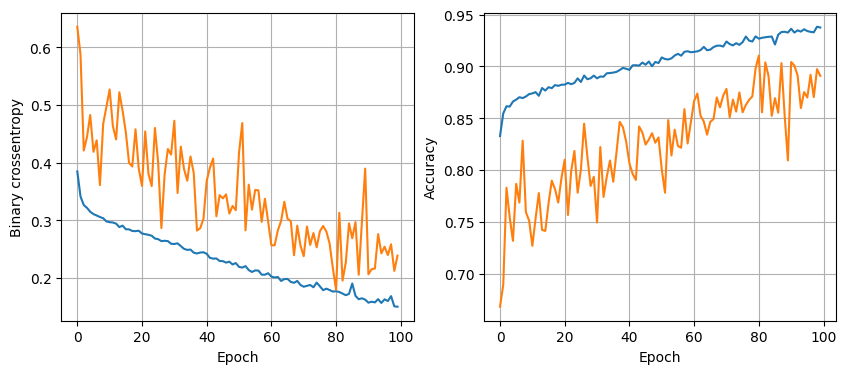

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step - accuracy: 0.8646 - loss: 0.5030
64 nodes, dropout 0, learning_rate 0.005, batch_size 128


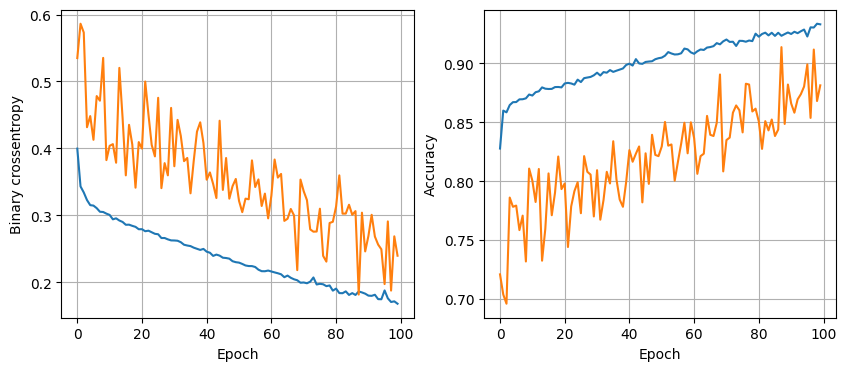

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step - accuracy: 0.8704 - loss: 0.4146
64 nodes, dropout 0, learning_rate 0.001, batch_size 32


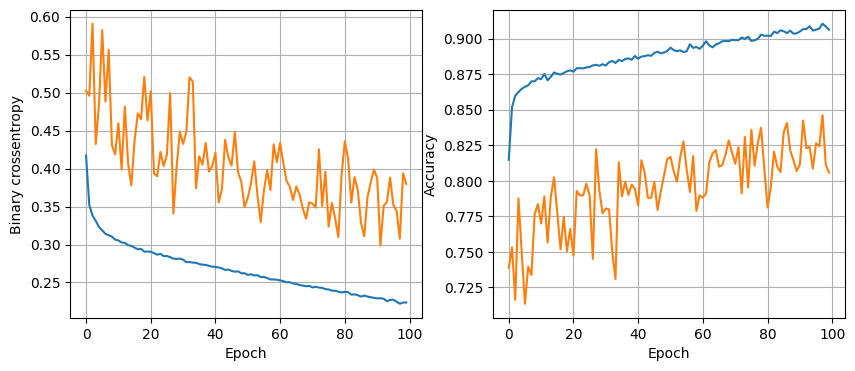

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step - accuracy: 0.8687 - loss: 0.3282
64 nodes, dropout 0, learning_rate 0.001, batch_size 64


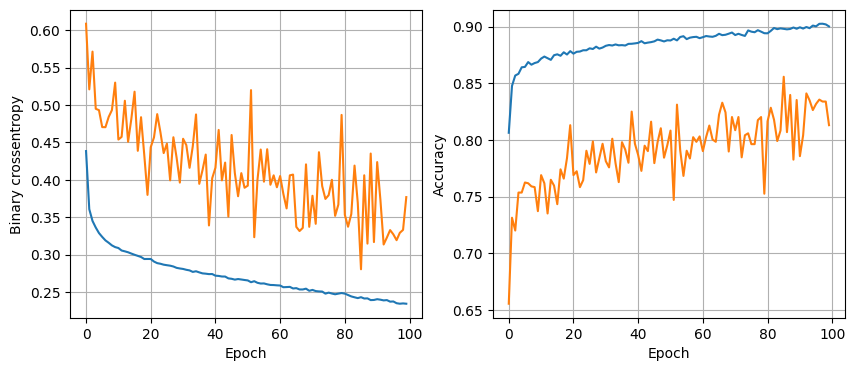

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step - accuracy: 0.8817 - loss: 0.3096
64 nodes, dropout 0, learning_rate 0.001, batch_size 128


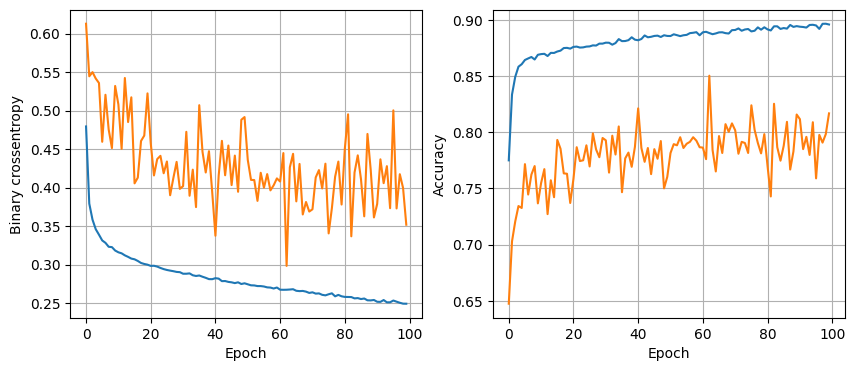

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step - accuracy: 0.8784 - loss: 0.3020
64 nodes, dropout 0.2, learning_rate 0.1, batch_size 32


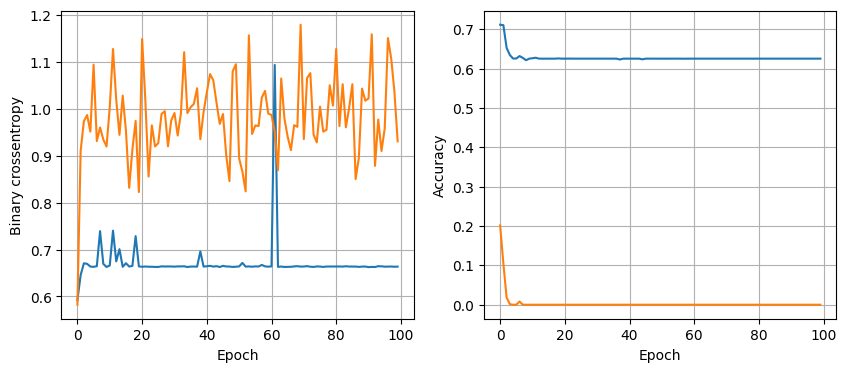

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 785us/step - accuracy: 0.6692 - loss: 0.6434
64 nodes, dropout 0.2, learning_rate 0.1, batch_size 64


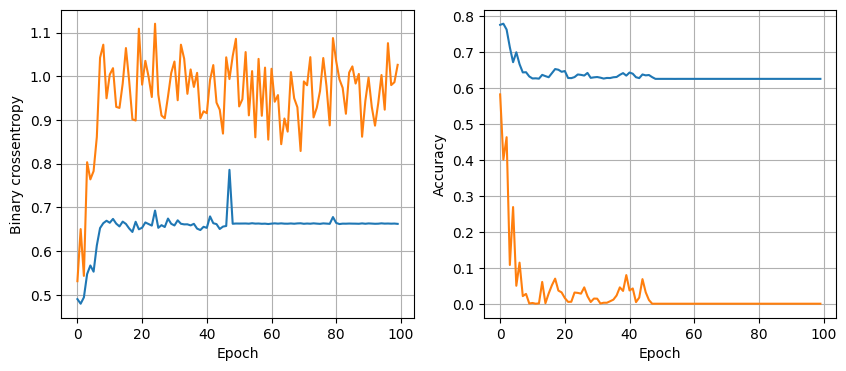

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step - accuracy: 0.6692 - loss: 0.6364
64 nodes, dropout 0.2, learning_rate 0.1, batch_size 128


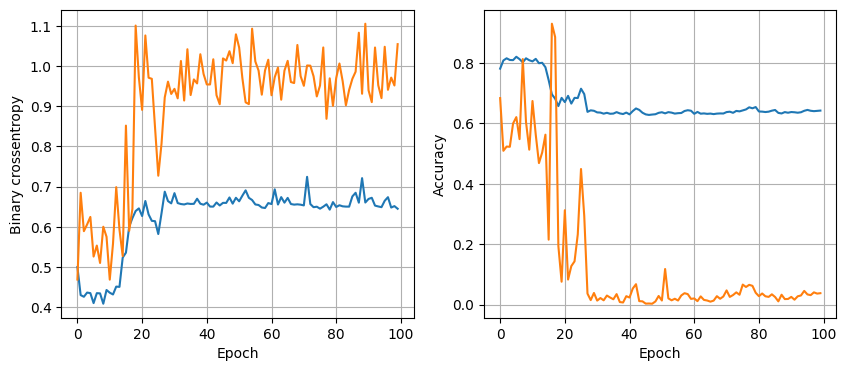

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step - accuracy: 0.6817 - loss: 0.6211
64 nodes, dropout 0.2, learning_rate 0.005, batch_size 32


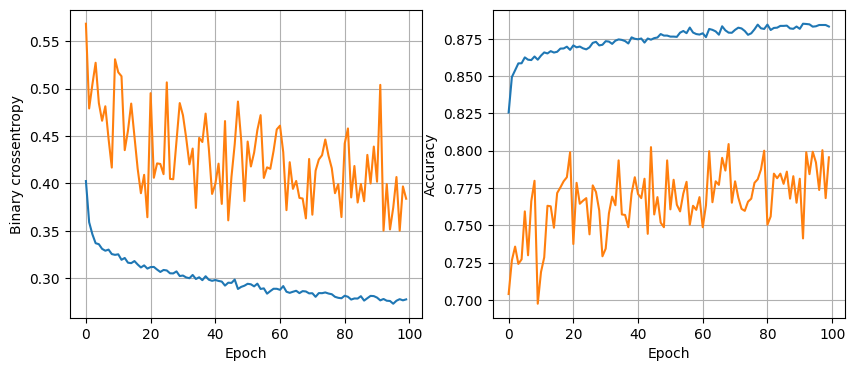

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step - accuracy: 0.8792 - loss: 0.2950
64 nodes, dropout 0.2, learning_rate 0.005, batch_size 64


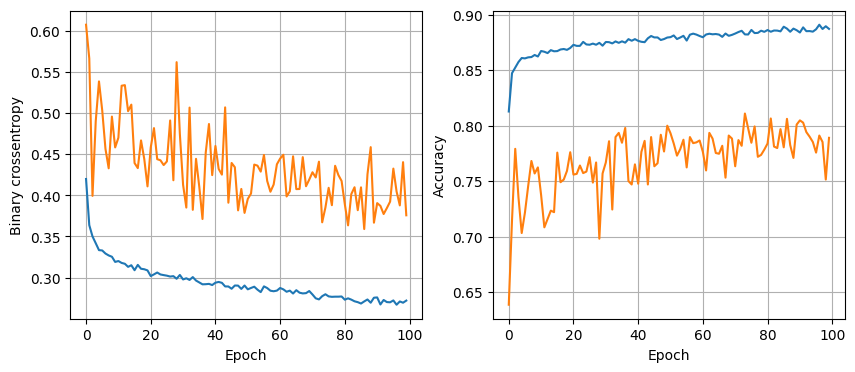

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step - accuracy: 0.8880 - loss: 0.2966
64 nodes, dropout 0.2, learning_rate 0.005, batch_size 128


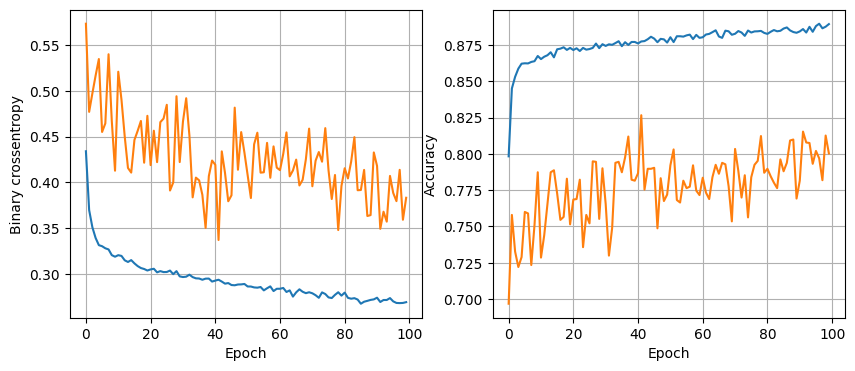

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step - accuracy: 0.8801 - loss: 0.2945
64 nodes, dropout 0.2, learning_rate 0.001, batch_size 32


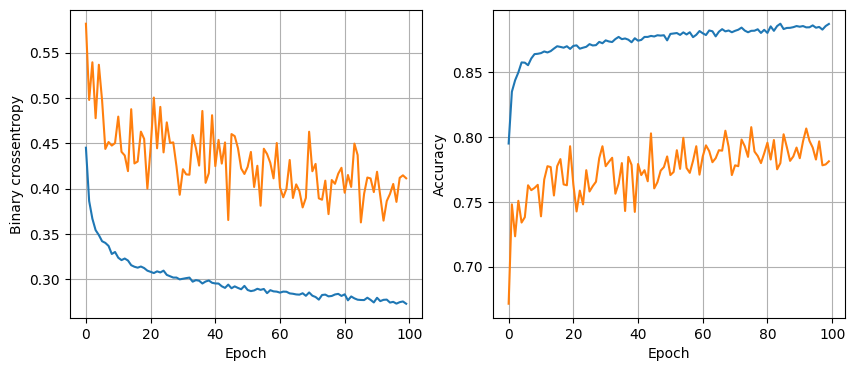

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step - accuracy: 0.8802 - loss: 0.2873
64 nodes, dropout 0.2, learning_rate 0.001, batch_size 64


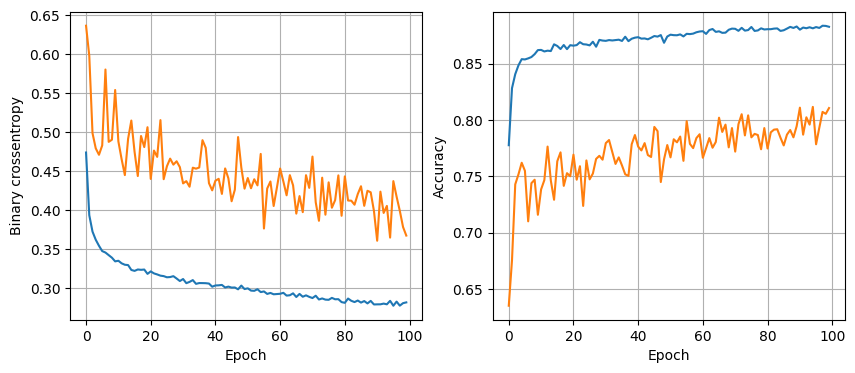

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step - accuracy: 0.8822 - loss: 0.2850
64 nodes, dropout 0.2, learning_rate 0.001, batch_size 128


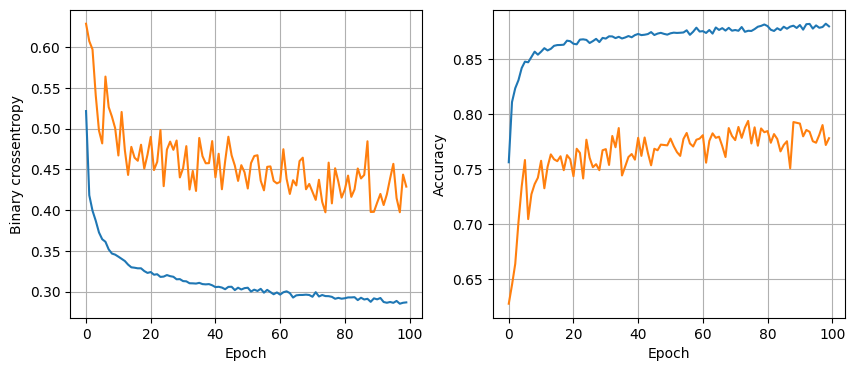

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step - accuracy: 0.8813 - loss: 0.2883


In [24]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16,32,64]:
  for dropout_prob in [0,0.2]:
    for learning_rate in [0.1, 0.005, 0.001]:
      for batch_size in [32,64,128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, learning_rate {learning_rate}, batch_size {batch_size}")
        model, history = train_model(x_train, y_train, num_nodes, dropout_prob, learning_rate,batch_size,epochs)
        plot_history(history)
        val_loss = model.evaluate(x_valid, y_valid)[0]

        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model


In [28]:
y_pred = least_loss_model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int)
print(classification_report(y_test, y_pred))

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step
              precision    recall  f1-score   support

           0       0.85      0.77      0.81      1293
           1       0.89      0.93      0.91      2511

    accuracy                           0.88      3804
   macro avg       0.87      0.85      0.86      3804
weighted avg       0.88      0.88      0.88      3804

